In [4]:
import json, os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import pickle as pkl

# load some data

In [18]:
data_X = np.load('/app/dev/Seasonal_Climate/other/X_train.npy')  #records x time x features
data_y = np.load('/app/dev/Seasonal_Climate/other/y_train.npy')  #records 

samples, time, features = data_X.shape
data_X = data_X.reshape(samples, -1)  #reshape as records x features

# feature names
feature_names = ['feature_'+str(i) for i in list(range(features))]

# split into train-test
X_train, X_val, y_train, y_val = train_test_split(data_X, data_y, test_size=0.25, shuffle=True)

## train a random forest

In [22]:
rf = RandomForestRegressor(n_estimators=500, n_jobs=20)
rf.fit(X_train, y_train)
y_pred_t = rf.predict(X_train)


## time-wise permutation feature importance

- In this section, we inspect the significance of features across time. 
- We will use the permutation importance scoring of root mean square error. 
- The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. 
- This procedure breaks the relationship between the feature and the target
- Hence the drop in the model score is indicative of how much the model depends on the feature. 
<br>To learn more about how it works, please see here https://scikit-learn.org/stable/modules/permutation_importance.html

In [ ]:
# generate importance scores over n iterations

n_repeats = 2  
permutation_imp = permutation_importance(rf, X_val, y_val, 
                                         n_repeats=n_repeats, random_state=42, n_jobs=30, \
                                         scoring='neg_root_mean_squared_error')

# obtain mean of iterations
permutation_imp_mean = permutation_imp['importances_mean']
permutation_imp_mean = permutation_imp_mean.reshape(time, features)

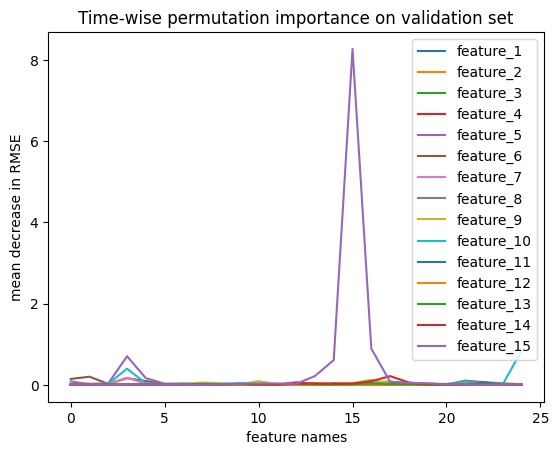

In [39]:
# plot features
fig, ax = plt.subplots()
for feature in list(range(features)):
    ax.plot(permutation_imp_mean[:, feature], label=feature_names[feature])


# Add title and labels
ax.legend()
ax.set_title('Time-wise permutation importance on validation set')
ax.set_xlabel('feature names')
ax.set_ylabel('mean decrease in RMSE')
plt.show()